#### 1. Google Play Store apps and reviews

Mobile applications are now part of our daily lives. They are relatively easy to develop and can generate substantial revenue.Beacause of this, the number of apps being launched keeps increasing

In this project, we will dive into an extensive analysis of the Andriod app marketplace by examining data from over 10,000 apps listed on Google Play Store across the various categories. Our goal is to uncover insights and trends that can help with strategies for the app growth and the user retention.

The dataset includes two main files:

apps.csv — This file contains detailed information about each app on the Google Play Store, covering 13 different features that describe each app.

user_reviews.csv — This file includes up to 100 user reviews per app, ranked by helpfulness. Each review has already been pre-processed and is labeled with three new features: Sentiment (Positive, Negative, or Neutral), Sentiment Polarity, and Sentiment Subjectivity.

In [2]:
# Reading the dataset
import pandas as pd
apps_with_duplicates=pd.read_csv(r"C:\Users\chatu\OneDrive\Desktop\oasis infobyte\apps.csv")

# Drop duplicates
apps=apps_with_duplicates.drop_duplicates()

# Print the total number of apps
print('Total number of apps in the dataset= ', apps['App'].count())

# Have a look at a random sample of 5 entries
n=5
apps.sample(n)

Total number of apps in the dataset=  9659


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3890,4828,Moto Z Market,TOOLS,2.2,605,3.8M,"1,000,000+",Free,0,Everyone,Tools,"December 18, 2017",02.02.0045,5.0 and up
2046,2589,Text free - Free Text + Call,SOCIAL,4.3,315441,NaN,"10,000,000+",Free,0,Everyone,Social,"July 26, 2018",Varies with device,Varies with device
2717,3451,"All-In-One Toolbox: Cleaner, Booster, App Manager",PRODUCTIVITY,4.7,536926,NaN,"10,000,000+",Free,0,Everyone,Productivity,"August 5, 2018",Varies with device,Varies with device
8370,9496,Master E.K,FAMILY,5.0,90,NaN,"1,000+",Free,0,Everyone,Education,"August 11, 2017",1.5.0,4.4 and up
3300,4167,My G:,MAPS_AND_NAVIGATION,3.7,96,14M,"10,000+",Free,0,Everyone,Maps & Navigation,"November 14, 2017",1.4.0,4.1 and up


#### 2. Data Cleaning

In this part we focus on three important columns: Installs,Size and Price, which are fundamental to our analysis.Upon inspecting the dataset, it becomes evident that these columns contain various non numeric characters such as commas, dollar signs, plus signs ($,+,) and letters like 'M' and 'k'. These characters hinder the process of converting these columns into usable numerical font. To ensure the accurate analysis, we will meticulously clean these columns by eliminating unnecessary characters and transforming each column into the correct numerical data type

In [6]:
# To remove the characters 
chars_to_remove=['+',',','M','$']
cols_to_clean=['Installs','Size','Price']

# Loop for each column
for col in cols_to_clean:
    # Replace the characters in each column col with empty string
    for char in chars_to_remove:
        apps[col]=apps[col].str.replace(char,'')
    #Convert col into numeric
    apps[col]=pd.to_numeric(apps[col])

#### Exploring the app categories

With a user base exceeding 1 billion people across 190 countries, Google Play is a key platform for developers aiming to reach a worldwide audience. For businesses striving to boost app engagement, ensuring their apps are easily discoverable is essential. To help users find the apps they’re looking for, Google Play organizes its apps into various categories. This organizational structure not only improves the user experience but also enables developers to more effectively connect with their target audiences.

This leads to the following questions:

- Which app category has the largest share of active apps?
- Are there categories that particularly dominate the market?
- Which categories have the fewest apps?

In our dataset, we find 33 distinct app categories. The categories Family and Game lead the pack with the highest number of apps. Interestingly, categories like Tools, Business, and Medical also show a strong presence.



Number of categories =  33


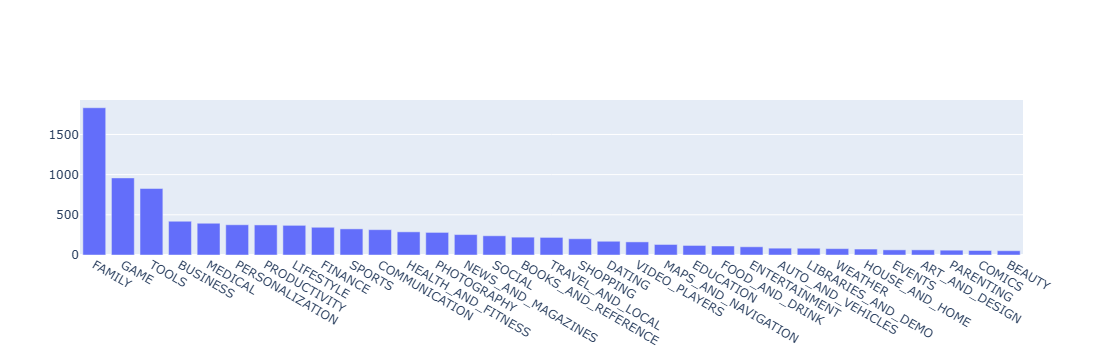

In [10]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Print the total number of unique categories
num_categories = len(set(apps['Category']))
print('Number of categories = ', num_categories)

# Count the number of apps in each 'Category' and sort them for easier plotting
num_apps_in_category = apps['Category'].value_counts().sort_values(ascending=False)

data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

plotly.offline.iplot(data)

### Distribution of app ratings

After analyzing the market share of each app category,our focus now shifts to assesing the average app performance based on user ratings. Ratings, typically on the scale from 1 to 5, play a key role in enhancing visibilty, driving conversions and shaping a brand's reputation. They are vital metric for evaluating the success of any app.

Our analysis reveals that the overall average rating acoss all app categories is approximately 4.17. The histogram displaying the distribution of ratings shows a right-skewed pattern, indicating that the majority of apps enjoy high ratings, while only a few apps fall below average in this regard.



Average app rating =  4.173243045387994


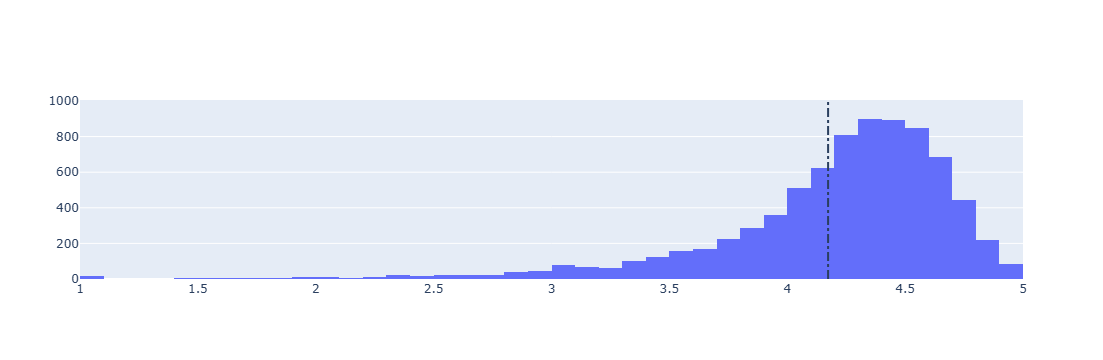

In [13]:
# Average rating of apps
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

# Distribution of apps according to their ratings
data = [go.Histogram(
        x = apps['Rating'],
        xbins = {'start': 1, 'size': 0.1, 'end' : 5}
)]

# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

#### Size and price of an app

Let's examine app size and the pricing. When it comes to size,apps that are toolarge can create obstacles for users by making downloads slow or data-intensive, potentially discouraging them before they can fully engage with the app. Limited device storage further exacerbates this issue. On the pricing front, users typically expect apps to be free or affordable, which is especially important in developing markets where factors like internet speed, income levels, and exchange rates shape user expectations and access.

This raises some important questions:

- What strategies can we adopt to manage app size and pricing effectively?

- Is there a connection between an app’s size and its rating?

- Do users gravitate toward lightweight apps over larger ones?

- Does an app’s price affect its user rating?

Are users consistently more inclined to download free apps rather than paid ones?

Our findings show that most highly rated apps (those with ratings above 4) tend to have sizes ranging from 2 MB to 20 MB. Furthermore, the overwhelming majority of apps in the market are priced under $10.



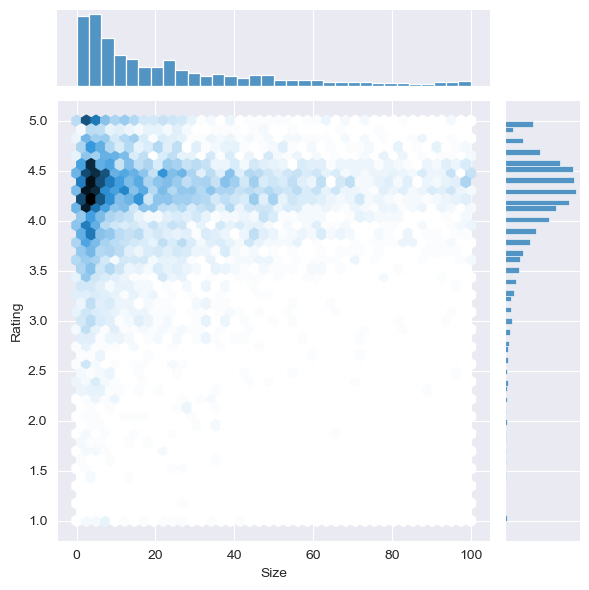

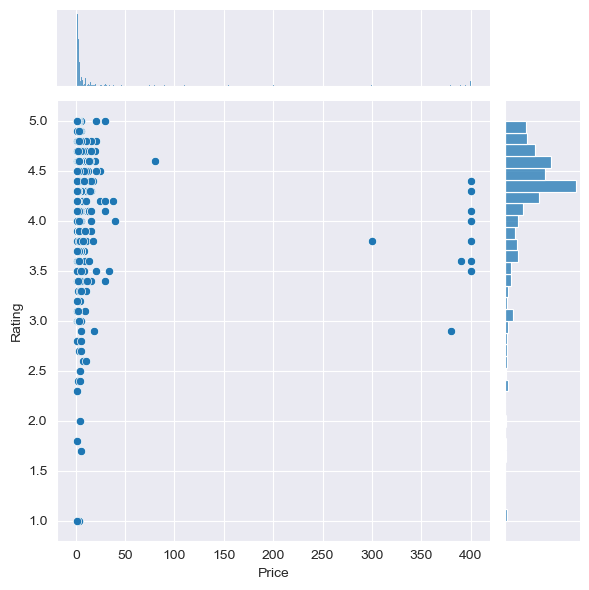

In [16]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# Subset for categories with at least 250 apps
large_categories = apps.groupby('Category').filter(lambda x: len(x) >= 250).reset_index()

# Plot size vs. rating
plt1 = sns.jointplot(x = 'Size', y = 'Rating', data = large_categories, kind = 'hex')

# Subset for paid apps only
paid_apps = apps[apps['Type'] == 'Paid']

# Plot price vs. rating
plt2 = sns.jointplot(x = 'Price', y = 'Rating', data = paid_apps)

#### 6. Relation between app category and app price

The key question arises : How can developers and companies secure profitablity ? Wbich monetatization strategies will help them maximize earnings? The expenses linked to the app development depend significantly on factors such as functionalityntricacy, and the choice of platform.

Deciding on the right pricing approach requires careful evaluation. One of the most important factors is understanding how much customers are willing to pay. If the price point is too high, potential users might not even consider downloadig the app. Furthermore, users might become frustpeorated if they feel the app is too expensive or bombarded with ads that don't allign with perceived value.

Pricing also varies across app categories. Basic and regularly used apps like calculators are typically free to download. On the other hand, it is reasonable to charge for highly specalized apps, such as those amied at diagnosing diabetes. In our analysis, we discovered that medical and family apps carry the highest prices, with some medical apps reaching up to 80 Dollars. Meanwhile, all gaming apps remain reasonably priced, below 20 Dollars'.

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


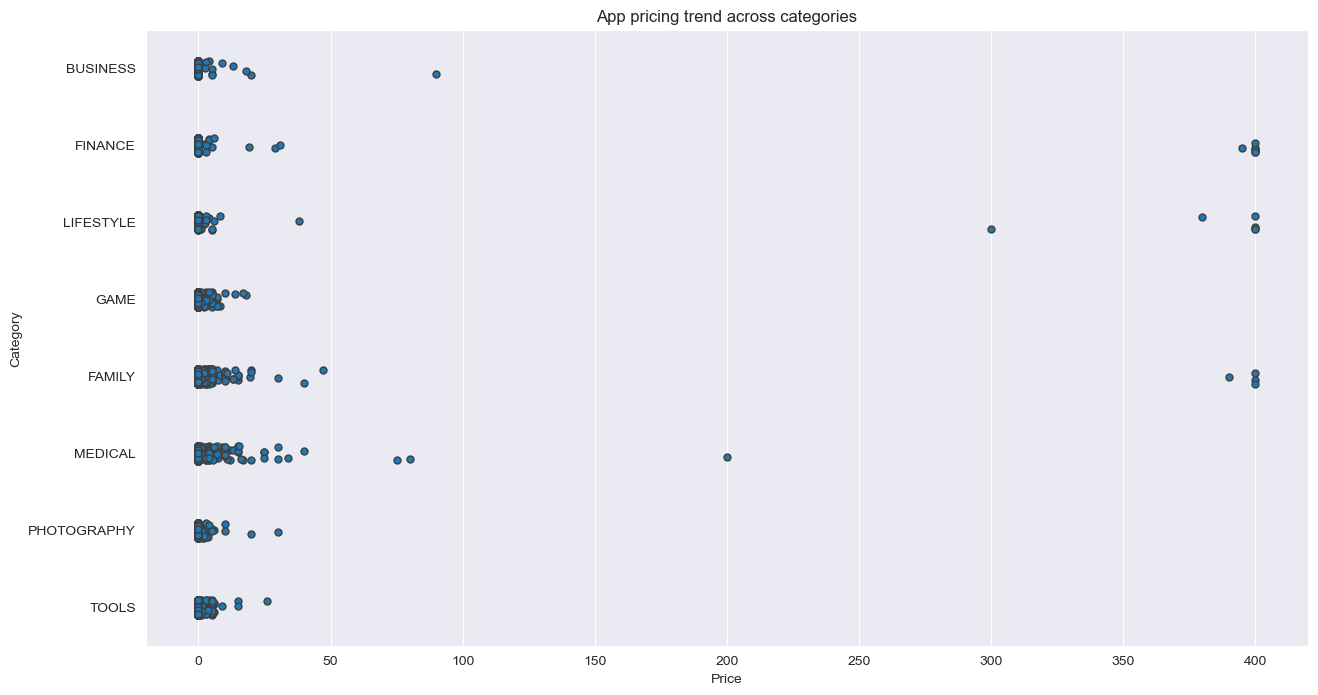

In [19]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend for the subset of categories
ax = sns.stripplot(x='Price', y='Category', data=popular_app_cats,
                   jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Category, Name and Price of apps priced above $200
apps_above_200 = popular_app_cats[['Category', 'App', 'Price']][popular_app_cats['Price'] > 200]
apps_above_200

#### 7.Filtering out Junk apps

It appears that many of the costly apps are what we might consider 'junk' apps those that lack a meaningful purpose.For example,a developer might create an app called Ultimate Random Button just for a joke or to test their app devlopment skils. In some cases,developers may even have malicious intentions,aiming to profit by enticing users to accidentally click on a purchase in the app store

Let us filter out these junk apps and revisit our visualization. This will provide a clearer picture of the distribution of apps priced under 20 dollars.

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

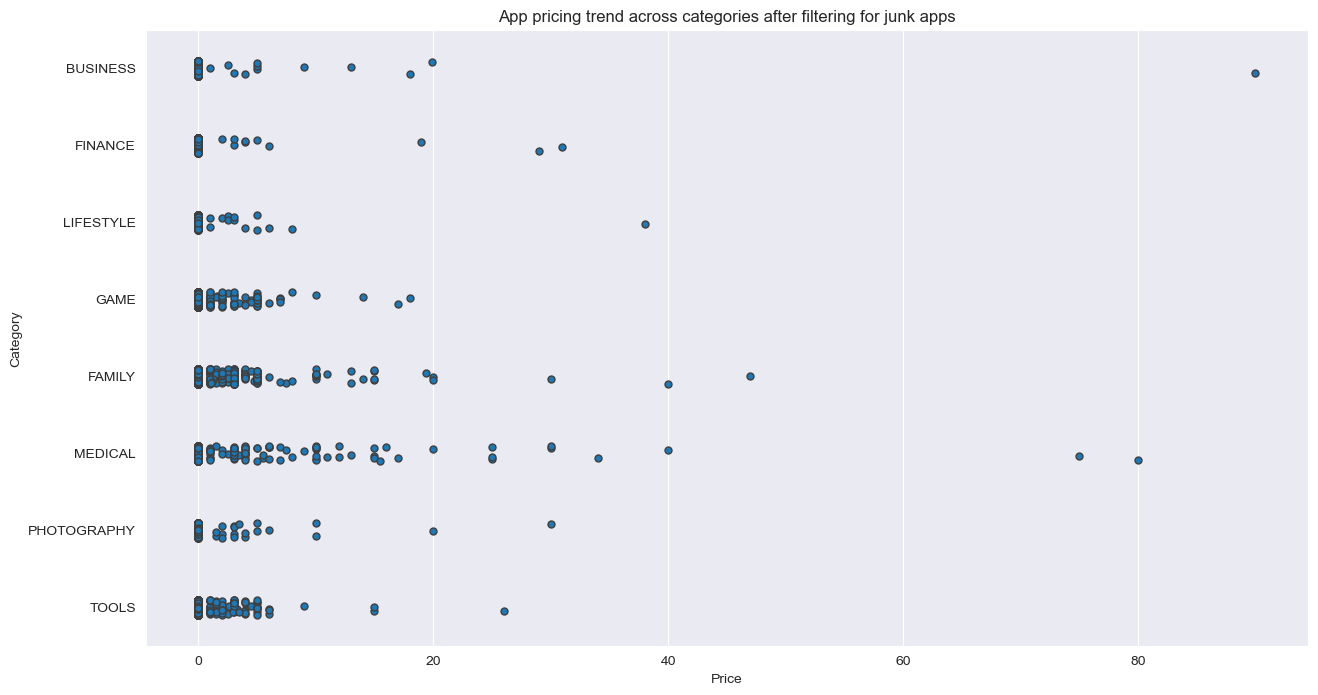

In [22]:
# Select the apps priced below $100
apps_under_100 = popular_app_cats[popular_app_cats['Price']<100]

fig,ax=plt.subplots()
fig.set_size_inches(15,8)

#Examine price vs category with the authentic apps
ax=sns.stripplot(x='Price',y='Category', data=apps_under_100,
                 jitter=True,linewidth=1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

#### 8. Popularity of paid apps vs free apps

In the current Google Play Store, there are four pricing models: free,freemimum,pay and paymium. For this analysis we  will focus on free and paid apps. Here are some key characteristics of free apps:

- Free to download
- Main source of income often comes form the advertisements
- They often developed by the companies with exisisting products, servinh as an extension of their products
- Can serve as a tool for customer retention, communication and customer service

Some characteristics of paid apps:

- Users are asked to pay once  for the app to download and use it
- The user can't really get a feel for the app before buying it

Are paid apps installed as frequently as free apps? Intrestingly, while paid apps tend to have a lower number of installs compared to free apps, the difference is not as pronounced as one might expect.


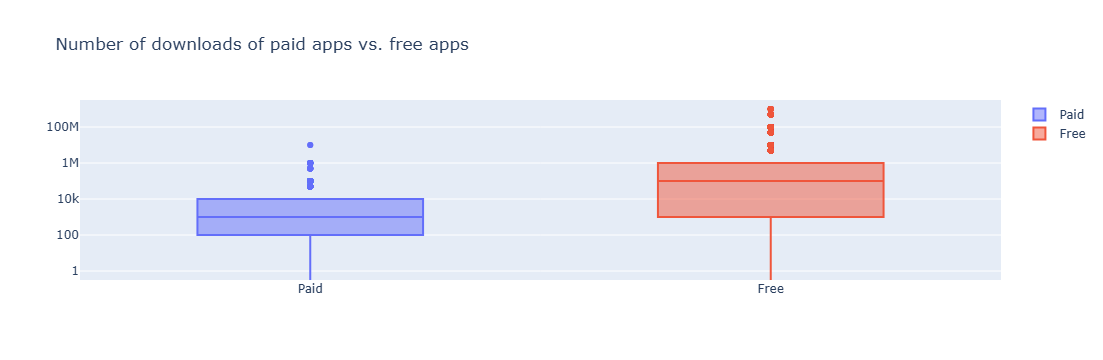

In [27]:
trace0 = go.Box(
    # Data for paid apps
    y=apps['Installs'][apps['Type'] == 'Paid'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y=apps['Installs'][apps['Type'] == 'Free'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(
        type = 'log',
        autorange = True
    )
)

# Add trace0 and trace1 to a list for plotting
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

#### 9. Sentiment analysis of user reviews

Mining user review to understand user sentiment towards your products,brand or service is possible through a technique called sentiment analysis. By examining app reviews,we can classify the overall sentiment as positive, negative or nuteral. For instance positive reviews might include the words like 'fantastic','friendly','excellent','great' and 'love'.On the other hand , negative reviews often contain terms such as 'malware','dislike','problem','refund' and 'poor service'.

When plotting sentiment polarity scores for user reviews across both paid and free apps, we find that free apps often attract more intense criticism, shown by the outliers on the negative y-axis. In contrst paid apps rarely reach extremely negative sentiment levels. This suggests a potential link between app quality and pricing, with paid apps generally being of higher quality than free apps. Aditionally, the median polarity score for paid apps is slightly higher than that of free apps, reinforcing this observation.

In this notebook we have analyzed over 10,000 apps form the google play store. These findings provide valuable insights that can inform our decisions should we decide to develop our own app.

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

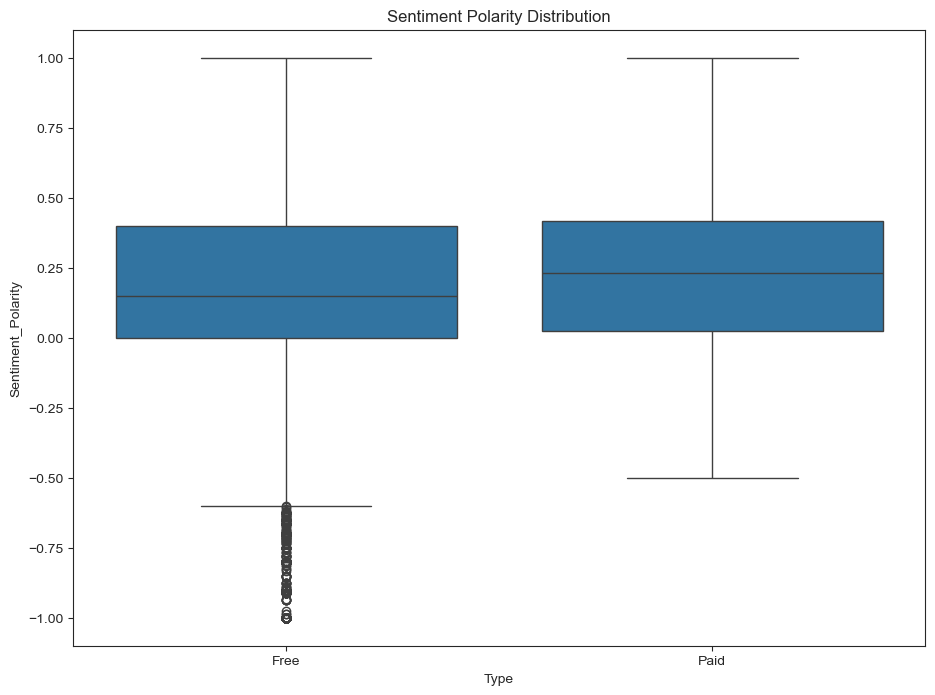

In [34]:
# Loading the user_review.csv

reviews_df=pd.read_csv(r"C:\Users\chatu\OneDrive\Desktop\oasis infobyte\user_reviews.csv")

# Join and merge the two dataframe
merged_df=pd.merge(apps,reviews_df,on='App',how='inner')

# Drop NA values from the sentiment and translated_review columns
merged_df= merged_df.dropna(subset=['Sentiment', 'Translated_Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')